# VISUALIZACIÓN DE DATOS de GEOCULT-APP CLASIFICACIÓN CON NN
<p> En este script se realizarán las siguientes tareas:</p>
<p>En primer lugar, se leerán los datos de la base de datos local y se preprocesarán estos datos para visualizar gráficas que representen información sobre las actividades culturales en Madrid</p>
<p>En segundo lugar, se implementará un algoritmo de clasificación, utilizando una red neuronal, que clasifique las actividades culturales de Madrid (almacenadas en una base de datos local), en actividades de pago o gratuitas considerando los siguientes atributos: "Audicence", "time", "event-location", "latitude" y "longitude".<p>
<p>Script diseñado e implementado por: Carlos Breuer Carrasco y Emilio Delgado Muñoz.<p>

# FASE 0 - LECTURA DE DOCUMENTOS DE LA BASE DE DATOS LOCAL

<p>Conexión y lectura de los documentos almacenados en la base de datos local de MongoDB<p>

In [1]:
"1. Importación de las librerías necesarias para ejecutar el script"
import requests 
import numpy as np 
import re
import os
import tarfile
import urllib
import pandas as pd
from pymongo import MongoClient
from os import listdir # library from the system used to read files from a directory
from os import path # library used to check the veracity of files and folders
import time # library used to control time spent on training operations
import matplotlib.pyplot as plt # library used to plot graphs and figures
import seaborn as sb # library used to make heatmaps from confusion matrices
from matplotlib import image # library used to import an image as a vector
import math # library used for math operations
import tensorflow as tf # machine learning library
from tensorflow import keras as k
from tensorflow.keras.utils import to_categorical # function from keras to make the one_hot matrix from the labels
from tensorflow.keras.models import Sequential # function from keras to initialize a sequential model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input # layers to include in a keras model
from tensorflow.keras import backend as K # backend from keras
from sklearn.model_selection import train_test_split # used for splitting the data set into train and test set
from pandas.plotting import scatter_matrix
import collections
import seaborn as sns # import seaborn library to plot confusion matrix with porcentage values

In [2]:
"2. Definición de la función para realizar la conexión con la base de datos"
def get_db(CONNECTION_STRING):
    from pymongo import MongoClient
    import pymongo
    
    client = MongoClient(CONNECTION_STRING)
    return client  

In [3]:
"3. Establecimiento de la conexión con MongoDB y acceso a la base de datos 'local'"
#Del cliente se selecciona la base de datos que se desea, en este caso la local
CONNECTION_STRING = 'mongodb://localhost:27017/?readPreference=primary&appname=MongoDB%20Compass&directConnection=true&ssl=false'
db = get_db(CONNECTION_STRING)['local']
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, readpreference='primary', appname='MongoDB Compass', directconnection=True, tls=False), 'local')


In [4]:
"4. Acceso a la colección 'CultureEvents' de la base de datos 'local'. Se muestra información de la colección"
collection_name = db['CultureEvents']
print(collection_name)

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, readpreference='primary', appname='MongoDB Compass', directconnection=True, tls=False), 'local'), 'CultureEvents')


In [5]:
"5. Función auxiliar para convertir una hora de una actividad cultural a un entero, respetando y manteniendo la escala original"
def time_to_numerical(time_str):
    if (time_str == '00:00'):
        return 1
    elif (time_str == '07:00'):
        return 29
    elif (time_str == '07:15'):
        return 30
    elif (time_str == '07:30'):
        return 31
    elif (time_str == '07:45'):
        return 32
    elif (time_str == '08:00'):
        return 33
    elif (time_str == '08:15'):
        return 34
    elif (time_str == '08:30'):
        return 35
    elif (time_str == '08:45'):
        return 36
    elif (time_str == '09:00'):
        return 37
    elif (time_str == '09:15'):
        return 38
    elif (time_str == '09:30'):
        return 39
    elif (time_str == '09:45'):
        return 40
    elif (time_str == '10:00'):
        return 41
    elif (time_str == '10:15'):
        return 42
    elif (time_str == '10:30'):
        return 43
    elif (time_str == '10:45'):
        return 44
    elif (time_str == '11:00'):
        return 45
    elif (time_str == '11:15'):
        return 46
    elif (time_str == '11:30'):
        return 47
    elif (time_str == '11:45'):
        return 48
    elif (time_str == '12:00'):
        return 49
    elif (time_str == '12:15'):
        return 50
    elif (time_str == '12:30'):
        return 51
    elif (time_str == '12:45'):
        return 52
    elif (time_str == '13:00'):
        return 53
    elif (time_str == '13:15'):
        return 54
    elif (time_str == '13:30'):
        return 55
    elif (time_str == '13:45'):
        return 56
    elif (time_str == '14:00'):
        return 57
    elif (time_str == '14:15'):
        return 58
    elif (time_str == '14:30'):
        return 59
    elif (time_str == '14:45'):
        return 60
    elif (time_str == '15:00'):
        return 61
    elif (time_str == '15:15'):
        return 62
    elif (time_str == '15:30'):
        return 63
    elif (time_str == '15:45'):
        return 64
    elif (time_str == '16:00'):
        return 65
    elif (time_str == '16:15'):
        return 66
    elif (time_str == '16:30'):
        return 67
    elif (time_str == '16:45'):
        return 68
    elif (time_str == '17:00'):
        return 69
    elif (time_str == '17:15'):
        return 70
    elif (time_str == '17:30'):
        return 71
    elif (time_str == '17:45'):
        return 72
    elif (time_str == '18:00'):
        return 73
    elif (time_str == '18:15'):
        return 74
    elif (time_str == '18:30'):
        return 75
    elif (time_str == '18:45'):
        return 76
    elif (time_str == '19:00'):
        return 77
    elif (time_str == '19:15'):
        return 78
    elif (time_str == '19:30'):
        return 79
    elif (time_str == '19:45'):
        return 80
    elif (time_str == '20:00'):
        return 81
    elif (time_str == '20:15'):
        return 82
    elif (time_str == '20:30'):
        return 83
    elif (time_str == '20:45'):
        return 84
    elif (time_str == '21:00'):
        return 85
    elif (time_str == '21:15'):
        return 86
    elif (time_str == '21:30'):
        return 87
    elif (time_str == '21:45'):
        return 88
    elif (time_str == '22:00'):
        return 89
    elif (time_str == '22:15'):
        return 90
    elif (time_str == '22:30'):
        return 91
    elif (time_str == '22:45'):
        return 92
    elif (time_str == '23:00'):
        return 93
    else:
        return 0

In [6]:
"6. Lectura de los datos de la colección de la base de datos a un dataframe de la librería pandas"
def read_mongo(db, collection, query={}):
    """ Read from Mongo and Store into DataFrame """

    # Make a query to the specific DB and Collection
    cursor = db[collection].find(query)
    
    # Define the dataframe
    df = pd.DataFrame(columns=("id","title","free","price", "dtstart", "dtend", "time", "time_code", "audience", "event-location", "latitude", "longitude"))

    # Expand the cursor and construct the DataFrame
    contador = 0
    list_words_prices = ['euros', 'Gratuito', 'gratuita', 'Gratis', 'libre', '']
    list_hours_time = ['19:01', '18:40']
    for doc in cursor:
        contador = contador + 1
        if(any(word in doc['price'] for word in list_words_prices) and doc['time'] not in list_hours_time):
            if ('euros' in doc['price']):
                price_list = [int(s) for s in re.findall(r'\b\d+\b', doc['price'])]
                precio = price_list[0]
            else:
                precio = 0
            if doc['time'] == '':
                hora_doc = "Sin especificar"
            else:
                hora_doc = doc['time']
            numerical_time = time_to_numerical(doc['time'])
            df = df.append({'id' : doc['id'],'title':doc['title'], 'free' : float(doc['free']), 'price' : float(precio),
                            'dtstart':doc['dtstart'], 'dtend':doc['dtend'], 'time':hora_doc, 'time_code':float(numerical_time),
                            'audience': doc['audience'], 'event-location' : doc['event-location'],
                            'latitude' : doc['location']['latitude'], 'longitude' : doc['location']['longitude']},
                           ignore_index=True, verify_integrity=False, sort=None) 
    
    df.drop_duplicates()
    #df = df.drop(df[(df.price > 50.0)].index)
    print("Documentos devueltos: ", df.shape[0])
    return df

In [7]:
geoCult_data = None
geoCult_data = read_mongo(db, 'CultureEvents', query={})
geoCult_data.head()

Documentos devueltos:  2306


,id,title,free,price,dtstart,dtend,time,time_code,audience,event-location,latitude,longitude
0,11630153,3 a 5 años. 'Lost and found' &amp; 'My pet',1.0,0.0,2022-04-18 18:00:00.0,2022-04-18 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal Miguel Delibes (M...,40.409717,-3.652982
1,11630154,3 a 5 años. 'Lost and found' &amp; 'My pet',1.0,0.0,2022-04-23 12:00:00.0,2022-04-23 23:59:00.0,12:00,49.0,"Niños,Familias",Biblioteca Pública Municipal de San Fermín (Us...,40.371162,-3.692743
2,11630144,3 a 5 años. 'The hungry caterpillar' &amp; 'Th...,1.0,0.0,2022-04-07 18:00:00.0,2022-04-07 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal José Saramago (Fu...,40.478601,-3.709441
3,11630143,3 a 5 años. 'The hungry caterpillar' &amp; 'Th...,1.0,0.0,2022-04-20 18:00:00.0,2022-04-20 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal Dámaso Alonso (Ch...,40.467453,-3.684611
4,11617935,57 premio Reina Sofía de pintura y escultura.,1.0,0.0,2022-03-03 00:00:00.0,2022-04-03 23:59:00.0,Sin especificar,0.0,No audience,Centro Cultural Casa de Vacas (Retiro),40.419060,-3.684062


In [8]:
geoCult_data["audience"].value_counts()

No audience                           1653
Niños                                  368
Niños,Familias                         117
Jovenes                                 54
Mujeres                                 42
Familias,Mayores                        23
Familias                                19
Mujeres,Familias                         9
Jovenes,Familias,Mayores                 7
Mayores                                  4
Mujeres,Mayores                          2
Jovenes,EstudianteseInvestigadores       1
Jovenes,Mujeres,Familias                 1
Jovenes,Niños,Mayores                    1
Jovenes,Niños                            1
Jovenes,Mayores                          1
Mujeres,InmigrantesyEmigrantes           1
Jovenes,Niños,Familias,Mayores           1
Jovenes,Niños,Familias                   1
Name: audience, dtype: int64

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
geoCult_data["audience_code"] = ord_enc.fit_transform(geoCult_data[["audience"]])
geoCult_data["audience_code"] = geoCult_data["audience_code"].astype('float64')
geoCult_data[["audience", "audience_code"]].head(11)

,audience,audience_code
0,"Niños,Familias",17.0
1,"Niños,Familias",17.0
2,"Niños,Familias",17.0
3,"Niños,Familias",17.0
4,No audience,18.0
5,"Niños,Familias",17.0
6,"Niños,Familias",17.0
7,"Niños,Familias",17.0
8,"Niños,Familias",17.0
9,"Niños,Familias",17.0


In [10]:
geoCult_data["audience_code"].value_counts()

18.0    1653
16.0     368
17.0     117
2.0       54
12.0      42
1.0       23
0.0       19
13.0       9
4.0        7
11.0       4
15.0       2
5.0        1
6.0        1
9.0        1
10.0       1
3.0        1
8.0        1
7.0        1
14.0       1
Name: audience_code, dtype: int64

In [11]:
geoCult_data["event-location"].value_counts()

Cineteca Madrid                                                                     71
Centro de Cultura Contemporánea Conde Duque                                         65
Espacio Abierto Quinta de los Molinos                                               60
Matadero Madrid                                                                     55
Biblioteca Pública Municipal Eugenio Trías. Casa de Fieras de El Retiro (Retiro)    50
                                                                                    ..
Catedral Santa María la Real de la Almudena                                          1
Parque de Fuencarral                                                                 1
Museo Lázaro Galdiano                                                                1
Instalación Deportiva Municipal Rocódromo 'Roc 30'                                   1
Parque Santa Eugenia                                                                 1
Name: event-location, Length: 206, dtype: i

In [12]:
geoCult_data["event-location_code"] = ord_enc.fit_transform(geoCult_data[["event-location"]])
geoCult_data["event-location_code"] = geoCult_data["event-location_code"].astype('float64')
geoCult_data[["event-location", "event-location_code"]].head(11)

,event-location,event-location_code
0,Biblioteca Pública Municipal Miguel Delibes (M...,35.0
1,Biblioteca Pública Municipal de San Fermín (Us...,43.0
2,Biblioteca Pública Municipal José Saramago (Fu...,28.0
3,Biblioteca Pública Municipal Dámaso Alonso (Ch...,18.0
4,Centro Cultural Casa de Vacas (Retiro),52.0
5,Biblioteca Pública Municipal San Blas (San Bla...,40.0
6,Biblioteca Pública Municipal Ciudad Lineal (Ci...,16.0
7,Biblioteca Pública Municipal Pozo del Tío Raim...,38.0
8,Biblioteca Pública Municipal La Elipa (Ciudad ...,30.0
9,Biblioteca Pública Municipal María Lejárraga (...,33.0


In [13]:
geoCult_data["event-location_code"].value_counts()

137.0    71
133.0    65
144.0    60
174.0    55
19.0     50
         ..
138.0     1
6.0       1
176.0     1
123.0     1
141.0     1
Name: event-location_code, Length: 206, dtype: int64

In [14]:
geoCult_data["price"].value_counts()

0.0      2188
18.0       19
20.0       14
3.0        13
10.0       12
6.0        11
4.0         9
5.0         9
8.0         6
30.0        5
7.0         3
40.0        2
16.0        2
24.0        2
12.0        2
38.0        2
140.0       1
22.0        1
9.0         1
150.0       1
1.0         1
205.0       1
28.0        1
Name: price, dtype: int64

In [15]:
geoCult_data["free"].value_counts()

1.0    1883
0.0     423
Name: free, dtype: int64

In [16]:
geoCult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2306 non-null   object 
 1   title                2306 non-null   object 
 2   free                 2306 non-null   float64
 3   price                2306 non-null   float64
 4   dtstart              2306 non-null   object 
 5   dtend                2306 non-null   object 
 6   time                 2306 non-null   object 
 7   time_code            2306 non-null   float64
 8   audience             2306 non-null   object 
 9   event-location       2306 non-null   object 
 10  latitude             2306 non-null   float64
 11  longitude            2306 non-null   float64
 12  audience_code        2306 non-null   float64
 13  event-location_code  2306 non-null   float64
dtypes: float64(7), object(7)
memory usage: 252.3+ KB


In [17]:
geoCult_data.head(10)

,id,title,free,price,dtstart,dtend,time,time_code,audience,event-location,latitude,longitude,audience_code,event-location_code
0,11630153,3 a 5 años. 'Lost and found' &amp; 'My pet',1.0,0.0,2022-04-18 18:00:00.0,2022-04-18 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal Miguel Delibes (M...,40.409717,-3.652982,17.0,35.0
1,11630154,3 a 5 años. 'Lost and found' &amp; 'My pet',1.0,0.0,2022-04-23 12:00:00.0,2022-04-23 23:59:00.0,12:00,49.0,"Niños,Familias",Biblioteca Pública Municipal de San Fermín (Us...,40.371162,-3.692743,17.0,43.0
2,11630144,3 a 5 años. 'The hungry caterpillar' &amp; 'Th...,1.0,0.0,2022-04-07 18:00:00.0,2022-04-07 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal José Saramago (Fu...,40.478601,-3.709441,17.0,28.0
3,11630143,3 a 5 años. 'The hungry caterpillar' &amp; 'Th...,1.0,0.0,2022-04-20 18:00:00.0,2022-04-20 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal Dámaso Alonso (Ch...,40.467453,-3.684611,17.0,18.0
4,11617935,57 premio Reina Sofía de pintura y escultura.,1.0,0.0,2022-03-03 00:00:00.0,2022-04-03 23:59:00.0,Sin especificar,0.0,No audience,Centro Cultural Casa de Vacas (Retiro),40.419060,-3.684062,18.0,52.0
5,11630142,6 a 9 años. 'The cat in the hat' &amp; 'Sown f...,1.0,0.0,2022-04-25 18:00:00.0,2022-04-25 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal San Blas (San Bla...,40.420232,-3.621811,17.0,40.0
6,11630140,6 a 9 años. 'The cat in the hat' &amp; 'Sown f...,1.0,0.0,2022-04-08 18:00:00.0,2022-04-08 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal Ciudad Lineal (Ci...,40.436447,-3.637292,17.0,16.0
7,11630141,6 a 9 años. 'The cat in the hat' &amp; 'Sown f...,1.0,0.0,2022-04-06 18:00:00.0,2022-04-06 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal Pozo del Tío Raim...,40.373586,-3.660255,17.0,38.0
8,11630150,6 a 9 años. 'The enormous turnip' &amp; 'Tell ...,1.0,0.0,2022-04-05 18:00:00.0,2022-04-05 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal La Elipa (Ciudad ...,40.423427,-3.651842,17.0,30.0
9,11630151,6 a 9 años. 'The enormous turnip' &amp; 'Tell ...,1.0,0.0,2022-04-09 12:00:00.0,2022-04-09 23:59:00.0,12:00,49.0,"Niños,Familias",Biblioteca Pública Municipal María Lejárraga (...,40.490416,-3.655357,17.0,33.0


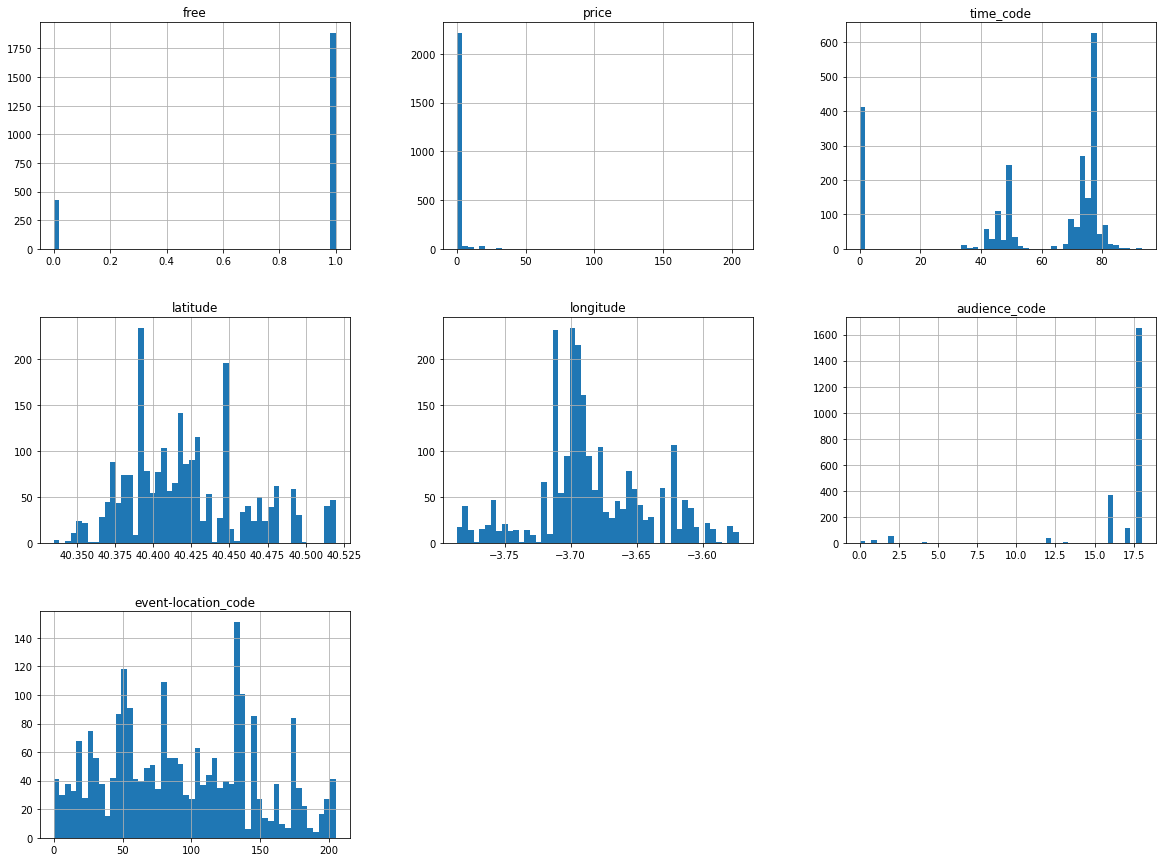

In [18]:
geoCult_data.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
geoCult_data.describe()

,free,price,time_code,latitude,longitude,audience_code,event-location_code
count,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000
mean,0.816565,0.850824,55.339983,40.421975,-3.684186,16.715958,92.547268
std,0.387106,6.930541,28.499583,0.039029,0.042352,3.525978,52.799590
min,0.000000,0.000000,0.000000,40.334752,-3.786130,0.000000,0.000000
25%,1.000000,0.000000,45.000000,40.392414,-3.708524,17.000000,51.000000
50%,1.000000,0.000000,73.000000,40.418784,-3.692206,18.000000,87.500000
75%,1.000000,0.000000,77.000000,40.447740,-3.655607,18.000000,135.000000
max,1.000000,205.000000,93.000000,40.519673,-3.572741,18.000000,205.000000


In [20]:
train_set, test_set = train_test_split(geoCult_data, test_size=0.2, random_state=42)

print("train = ", len(train_set), "test = ", len(test_set))

train =  1844 test =  462


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

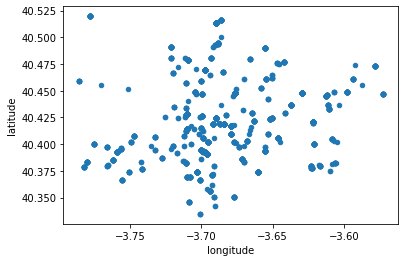

In [21]:
geoCult_data = train_set.copy()
geoCult_data.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

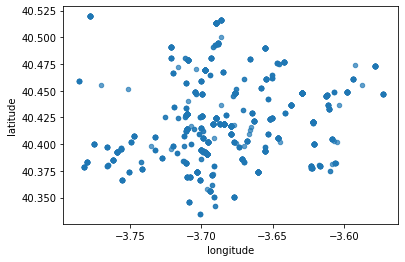

In [22]:
geoCult_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.7)

array([[<AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='price', ylabel='latitude'>,
        <AxesSubplot:xlabel='event-location_code', ylabel='latitude'>,
        <AxesSubplot:xlabel='free', ylabel='latitude'>,
        <AxesSubplot:xlabel='time_code', ylabel='latitude'>,
        <AxesSubplot:xlabel='audience_code', ylabel='latitude'>],
       [<AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='price', ylabel='longitude'>,
        <AxesSubplot:xlabel='event-location_code', ylabel='longitude'>,
        <AxesSubplot:xlabel='free', ylabel='longitude'>,
        <AxesSubplot:xlabel='time_code', ylabel='longitude'>,
        <AxesSubplot:xlabel='audience_code', ylabel='longitude'>],
       [<AxesSubplot:xlabel='latitude', ylabel='price'>,
        <AxesSubplot:xlabel='longitude', ylabel='price'>,
        <AxesS

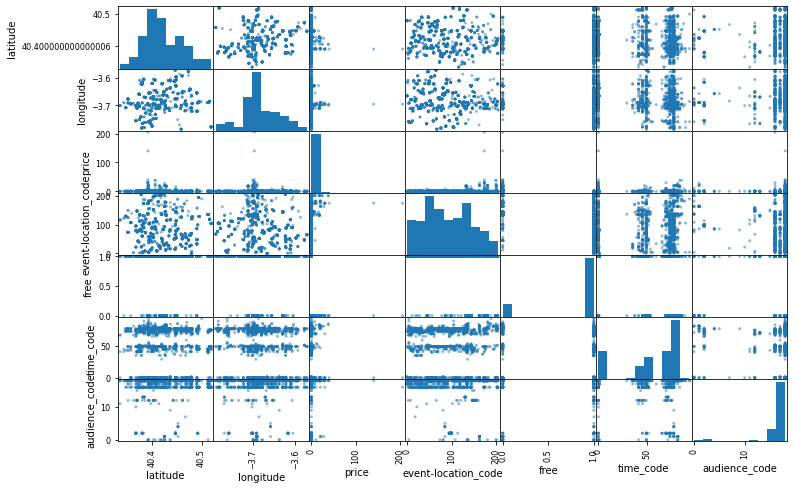

In [23]:
attributes = ["latitude", "longitude", "price", "event-location_code", "free", "time_code", "audience_code"]
scatter_matrix(geoCult_data[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='longitude', ylabel='price'>

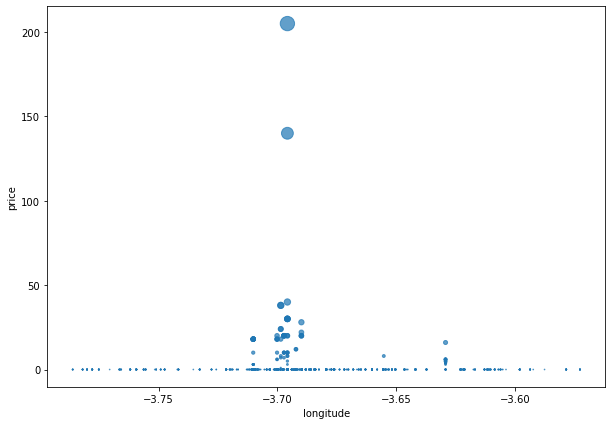

In [24]:
geoCult_data.plot(kind="scatter", x="longitude", y="price",
                  alpha=0.7, s=geoCult_data["price"]+0.5, figsize=(10,7))

<AxesSubplot:xlabel='latitude', ylabel='price'>

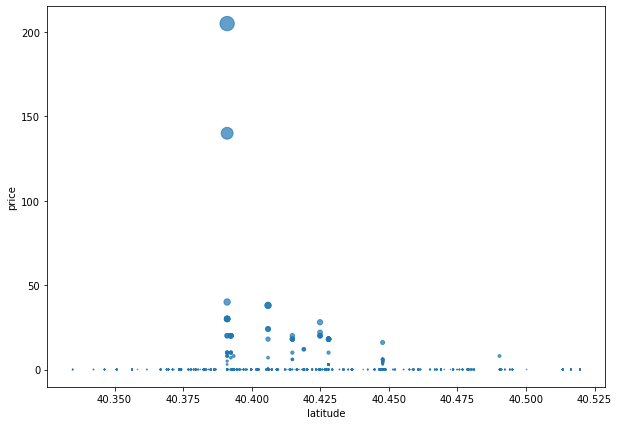

In [25]:
geoCult_data.plot(kind="scatter", x="latitude", y="price",
                  alpha=0.7, s=geoCult_data["price"]+0.5, figsize=(10,7))

<AxesSubplot:xlabel='event-location', ylabel='price'>

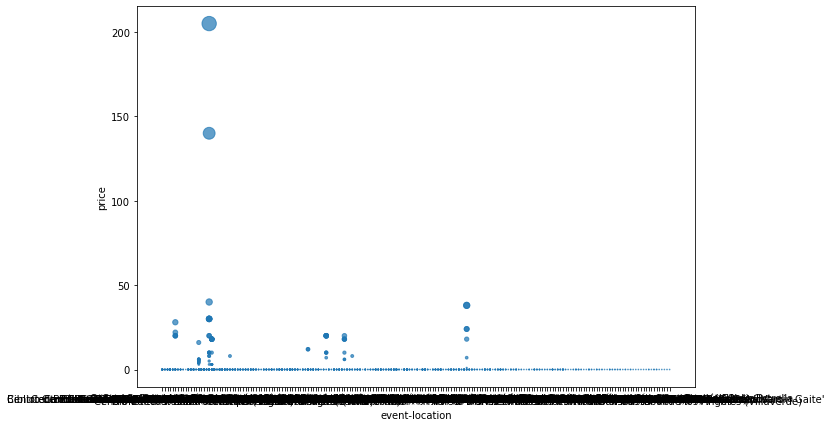

In [26]:
geoCult_data.plot(kind="scatter", x="event-location", y="price", 
                  s=geoCult_data["price"]+0.5, figsize=(10,7), alpha=0.7)

<AxesSubplot:xlabel='time', ylabel='price'>

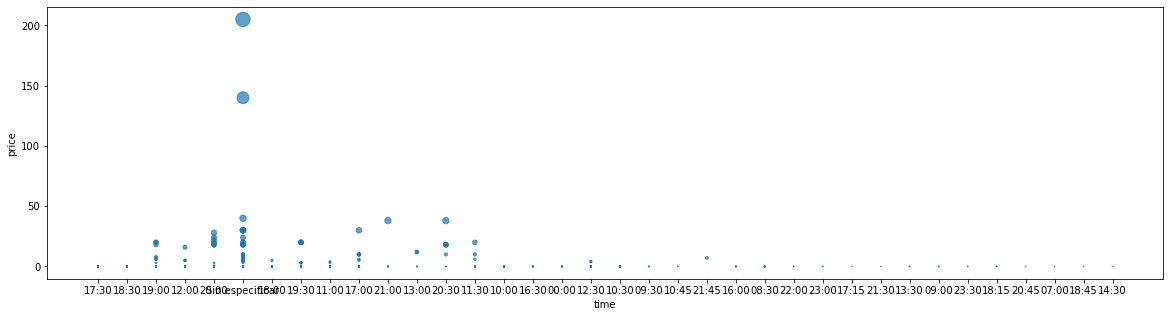

In [27]:
geoCult_data.plot(kind="scatter", x="time", y="price",
                  s=geoCult_data["price"]+0.5, figsize=(20,5), alpha=0.7)

# BALANCEO Y PREPARACIÓN DE DATOS

In [28]:
"Se eliminan las columnas innecesarias que no se utilizarán para entrenar la red neuronal"
geoCult_data.pop('id')
geoCult_data.pop('title')
geoCult_data.pop('dtstart')
geoCult_data.pop('dtend')
geoCult_data.pop('event-location')
geoCult_data.pop('audience')
geoCult_data.pop('time')
geoCult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 651 to 860
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   free                 1844 non-null   float64
 1   price                1844 non-null   float64
 2   time_code            1844 non-null   float64
 3   latitude             1844 non-null   float64
 4   longitude            1844 non-null   float64
 5   audience_code        1844 non-null   float64
 6   event-location_code  1844 non-null   float64
dtypes: float64(7)
memory usage: 115.2 KB


In [29]:
"Balanceo de muestras: se eliminan los documentos o tuplas de la clase con mayor número de documentos."
"De este modo, el número de muestras de una clase y de la otra se equilibran"

menor_numero_doc_clase = geoCult_data['free'].value_counts(ascending=True)[0]
menor_numero_doc_clase_nombre = geoCult_data['free'].value_counts(ascending=True).index.tolist()[0]

geoCult_data = geoCult_data.sample(frac=1).reset_index(drop=True)

contador = 0
for index, row in geoCult_data.iterrows():
    if row['free'] != menor_numero_doc_clase_nombre and contador < menor_numero_doc_clase:
        contador = contador + 1
    elif (row['free'] != menor_numero_doc_clase_nombre and contador >= menor_numero_doc_clase):
        geoCult_data.drop(index, inplace=True)

In [30]:
geoCult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 1843
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   free                 682 non-null    float64
 1   price                682 non-null    float64
 2   time_code            682 non-null    float64
 3   latitude             682 non-null    float64
 4   longitude            682 non-null    float64
 5   audience_code        682 non-null    float64
 6   event-location_code  682 non-null    float64
dtypes: float64(7)
memory usage: 42.6 KB


array([[<AxesSubplot:xlabel='free', ylabel='free'>]], dtype=object)

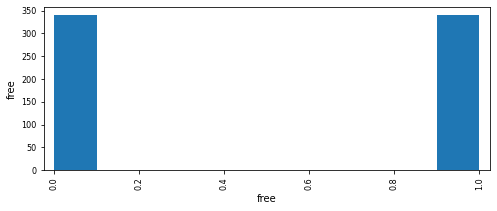

In [31]:
scatter_matrix(geoCult_data[['free']], figsize=(8, 3))

# DIVISIÓN DEL DATASET BALANCEADO EN TEST Y TRAIN+VAL

In [32]:
" Se mezclan las filas del dataframe de forma aleatoria utilizando una semilla y restableciendo el índice de cada fila"
geoCult_data = geoCult_data.sample(frac=1, random_state=8).reset_index(drop=True)
# Where:
# - frac=1 specifies returning 100% of the original rows of the 
# dataframe (in random order). Change to a decimal (e.g. 0.5) if
# you want to sample say, 50% of the original rows
# - random_state=1 sets the seed for the random number generator and
# is useful to specify if you want results to be reproducible
# - .reset_index(drop=True) specifies resetting the row index of the
# shuffled dataframe

In [33]:
" División de filas del dataframe para TEST (1er grupo) y para TRAIN+VALIDATION (2º grupo)"
print("Nº de filas originales: ", len(geoCult_data))
geoCult_data_TEST, geoCult_data = np.split(geoCult_data, [int(.1*len(geoCult_data))])
print("Nº de filas para TEST: ", len(geoCult_data_TEST))
print("HEAD DE TEST: ")
geoCult_data_TEST.head(5)
print("Nº de filas para ENTRENAMIENTO + VALIDACIÓN de la NN: ", len(geoCult_data))
print("HEAD DE ENTRENAMIENTO + VALIDACIÓN: ")
geoCult_data.head(5)

Nº de filas originales:  682
Nº de filas para TEST:  68
HEAD DE TEST: 
Nº de filas para ENTRENAMIENTO + VALIDACIÓN de la NN:  614
HEAD DE ENTRENAMIENTO + VALIDACIÓN: 


,free,price,time_code,latitude,longitude,audience_code,event-location_code
68,0.0,0.0,0.0,40.391055,-3.695807,18.0,174.0
69,0.0,0.0,73.0,40.392458,-3.697207,18.0,175.0
70,1.0,0.0,0.0,40.519673,-3.777906,18.0,104.0
71,1.0,0.0,0.0,40.449004,-3.606916,12.0,158.0
72,0.0,4.0,51.0,40.447740,-3.629287,18.0,144.0


<h2>Clasificación</h2>

In [34]:
y_train = geoCult_data.pop('free').to_numpy()

print("Counter: ", collections.Counter(y_train))

Counter:  Counter({0.0: 312, 1.0: 302})


In [35]:
def build_model(shape):
    model = Sequential()
    model.add(Input(shape))
    model.add(Dense(64,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [36]:
dense_net = build_model(geoCult_data.shape[1])

In [37]:
dense_net.compile(loss='binary_crossentropy',optimizer=k.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy','Precision'])

In [38]:
dense_net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,817
Trainable params: 2,689
Non-trainable params: 128
____________________________________________________

In [39]:
X_train = geoCult_data.to_numpy()

In [40]:
X_train = X_train.astype('float64')
print("Shape of data: ", X_train.shape)

Shape of data:  (614, 6)


In [41]:
X_train_model, X_val_model, y_train_model, y_val_model = train_test_split(X_train, y_train, test_size=0.33, shuffle=True, random_state=40)

In [42]:
import collections

print(collections.Counter(y_train))

Counter({0.0: 312, 1.0: 302})


In [43]:
tic = time.time() # getting the tic time in order to know the start time of the process of training

history = dense_net.fit(X_train,y_train,batch_size=64,validation_data=(X_val_model, y_val_model), epochs=2500,verbose=1)

toc = time.time() # getting the toc time in order to know the end time of the process of training

print("Time spent: ", (toc-tic)/60)

Epoch 1/2500
10/10 [==============================] - 1s 61ms/step - loss: 0.6832 - accuracy: 0.6580 - precision: 0.6179 - val_loss: 0.5518 - val_accuracy: 0.7143 - val_precision: 0.6620
Epoch 2/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.6661 - accuracy: 0.6596 - precision: 0.6227 - val_loss: 0.5138 - val_accuracy: 0.7882 - val_precision: 0.7563
Epoch 3/2500
10/10 [==============================] - 0s 8ms/step - loss: 0.6754 - accuracy: 0.6482 - precision: 0.6144 - val_loss: 0.5090 - val_accuracy: 0.7783 - val_precision: 0.8242
Epoch 4/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.6973 - accuracy: 0.6678 - precision: 0.6361 - val_loss: 0.5082 - val_accuracy: 0.7488 - val_precision: 0.8732
Epoch 5/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.6674 - accuracy: 0.6775 - precision: 0.6461 - val_loss: 0.5049 - val_accuracy: 0.7488 - val_precision: 0.8841
Epoch 6/2500
10/10 [==============================] - 0s 5ms/step - l

Epoch 45/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.5262 - accuracy: 0.7752 - precision: 0.7867 - val_loss: 0.4345 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 46/2500
10/10 [==============================] - 0s 10ms/step - loss: 0.5050 - accuracy: 0.7915 - precision: 0.7979 - val_loss: 0.4338 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 47/2500
10/10 [==============================] - 0s 10ms/step - loss: 0.4910 - accuracy: 0.7964 - precision: 0.7980 - val_loss: 0.4332 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 48/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.5246 - accuracy: 0.7818 - precision: 0.7917 - val_loss: 0.4325 - val_accuracy: 0.8177 - val_precision: 0.8681
Epoch 49/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.5076 - accuracy: 0.7801 - precision: 0.7909 - val_loss: 0.4322 - val_accuracy: 0.8177 - val_precision: 0.8681
Epoch 50/2500
10/10 [==============================] - 0s 5ms/s

Epoch 89/2500
10/10 [==============================] - 0s 15ms/step - loss: 0.4985 - accuracy: 0.8143 - precision: 0.8241 - val_loss: 0.4192 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 90/2500
10/10 [==============================] - 0s 10ms/step - loss: 0.4900 - accuracy: 0.8029 - precision: 0.8047 - val_loss: 0.4189 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 91/2500
10/10 [==============================] - 0s 13ms/step - loss: 0.4666 - accuracy: 0.8029 - precision: 0.8007 - val_loss: 0.4186 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 92/2500
10/10 [==============================] - 0s 9ms/step - loss: 0.4833 - accuracy: 0.7997 - precision: 0.8140 - val_loss: 0.4183 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 93/2500
10/10 [==============================] - 0s 13ms/step - loss: 0.4765 - accuracy: 0.8143 - precision: 0.8381 - val_loss: 0.4181 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 94/2500
10/10 [==============================] - 0s 11m

10/10 [==============================] - 0s 4ms/step - loss: 0.4606 - accuracy: 0.8290 - precision: 0.8530 - val_loss: 0.4104 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 133/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.4539 - accuracy: 0.8192 - precision: 0.8399 - val_loss: 0.4102 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 134/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4769 - accuracy: 0.8160 - precision: 0.8339 - val_loss: 0.4100 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 135/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4372 - accuracy: 0.8388 - precision: 0.8638 - val_loss: 0.4096 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 136/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4726 - accuracy: 0.8127 - precision: 0.8304 - val_loss: 0.4096 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 137/2500
10/10 [==============================] - 0s 5ms/step - loss:

Epoch 176/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.4342 - accuracy: 0.8127 - precision: 0.8258 - val_loss: 0.4036 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 177/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.4374 - accuracy: 0.8322 - precision: 0.8443 - val_loss: 0.4034 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 178/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.4299 - accuracy: 0.8339 - precision: 0.8448 - val_loss: 0.4032 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 179/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.4279 - accuracy: 0.8225 - precision: 0.8434 - val_loss: 0.4031 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 180/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4559 - accuracy: 0.8241 - precision: 0.8415 - val_loss: 0.4028 - val_accuracy: 0.8128 - val_precision: 0.8667
Epoch 181/2500
10/10 [==============================] - 0s 6

10/10 [==============================] - 0s 4ms/step - loss: 0.4271 - accuracy: 0.8371 - precision: 0.8531 - val_loss: 0.3979 - val_accuracy: 0.8079 - val_precision: 0.8571
Epoch 220/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.4545 - accuracy: 0.8160 - precision: 0.8387 - val_loss: 0.3978 - val_accuracy: 0.8079 - val_precision: 0.8571
Epoch 221/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4297 - accuracy: 0.8241 - precision: 0.8368 - val_loss: 0.3978 - val_accuracy: 0.8079 - val_precision: 0.8571
Epoch 222/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.4224 - accuracy: 0.8241 - precision: 0.8415 - val_loss: 0.3976 - val_accuracy: 0.8079 - val_precision: 0.8571
Epoch 223/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.4182 - accuracy: 0.8306 - precision: 0.8462 - val_loss: 0.3976 - val_accuracy: 0.8079 - val_precision: 0.8571
Epoch 224/2500
10/10 [==============================] - 0s 6ms/step - loss:

Epoch 263/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.4219 - accuracy: 0.8469 - precision: 0.8688 - val_loss: 0.3926 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 264/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.4192 - accuracy: 0.8339 - precision: 0.8472 - val_loss: 0.3927 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 265/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.4532 - accuracy: 0.8013 - precision: 0.8125 - val_loss: 0.3928 - val_accuracy: 0.8079 - val_precision: 0.8571
Epoch 266/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.4237 - accuracy: 0.8160 - precision: 0.8436 - val_loss: 0.3919 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 267/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.4039 - accuracy: 0.8388 - precision: 0.8638 - val_loss: 0.3919 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 268/2500
10/10 [==============================] - 0s 8

10/10 [==============================] - 0s 4ms/step - loss: 0.3790 - accuracy: 0.8274 - precision: 0.8551 - val_loss: 0.3873 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 307/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4050 - accuracy: 0.8306 - precision: 0.8486 - val_loss: 0.3873 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 308/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.4305 - accuracy: 0.8371 - precision: 0.8713 - val_loss: 0.3873 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 309/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4234 - accuracy: 0.8176 - precision: 0.8393 - val_loss: 0.3873 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 310/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4463 - accuracy: 0.8241 - precision: 0.8464 - val_loss: 0.3871 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 311/2500
10/10 [==============================] - 0s 6ms/step - loss:

Epoch 350/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4168 - accuracy: 0.8388 - precision: 0.8745 - val_loss: 0.3823 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 351/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4161 - accuracy: 0.8339 - precision: 0.8597 - val_loss: 0.3820 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 352/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4041 - accuracy: 0.8420 - precision: 0.8700 - val_loss: 0.3821 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 353/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4093 - accuracy: 0.8371 - precision: 0.8633 - val_loss: 0.3816 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 354/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3892 - accuracy: 0.8550 - precision: 0.8845 - val_loss: 0.3816 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 355/2500
10/10 [==============================] - 0s 5

10/10 [==============================] - 0s 4ms/step - loss: 0.4047 - accuracy: 0.8322 - precision: 0.8592 - val_loss: 0.3768 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 394/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4010 - accuracy: 0.8436 - precision: 0.8679 - val_loss: 0.3768 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 395/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4088 - accuracy: 0.8339 - precision: 0.8448 - val_loss: 0.3767 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 396/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.4069 - accuracy: 0.8339 - precision: 0.8650 - val_loss: 0.3766 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 397/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.4090 - accuracy: 0.8339 - precision: 0.8546 - val_loss: 0.3764 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 398/2500
10/10 [==============================] - 0s 4ms/step - loss:

Epoch 437/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4093 - accuracy: 0.8420 - precision: 0.8622 - val_loss: 0.3746 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 438/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4186 - accuracy: 0.8257 - precision: 0.8520 - val_loss: 0.3747 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 439/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3976 - accuracy: 0.8518 - precision: 0.8809 - val_loss: 0.3755 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 440/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.4068 - accuracy: 0.8339 - precision: 0.8731 - val_loss: 0.3765 - val_accuracy: 0.8079 - val_precision: 0.8571
Epoch 441/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.4024 - accuracy: 0.8404 - precision: 0.8669 - val_loss: 0.3767 - val_accuracy: 0.8079 - val_precision: 0.8571
Epoch 442/2500
10/10 [==============================] - 0s 5

10/10 [==============================] - 0s 6ms/step - loss: 0.4079 - accuracy: 0.8388 - precision: 0.8638 - val_loss: 0.3697 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 481/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3950 - accuracy: 0.8339 - precision: 0.8546 - val_loss: 0.3698 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 482/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3910 - accuracy: 0.8550 - precision: 0.8873 - val_loss: 0.3694 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 483/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3928 - accuracy: 0.8388 - precision: 0.8512 - val_loss: 0.3690 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 484/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3694 - accuracy: 0.8420 - precision: 0.8648 - val_loss: 0.3685 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 485/2500
10/10 [==============================] - 0s 5ms/step - loss:

Epoch 524/2500
10/10 [==============================] - 0s 8ms/step - loss: 0.3923 - accuracy: 0.8420 - precision: 0.8700 - val_loss: 0.3657 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 525/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3612 - accuracy: 0.8436 - precision: 0.8705 - val_loss: 0.3658 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 526/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3897 - accuracy: 0.8469 - precision: 0.8796 - val_loss: 0.3656 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 527/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3874 - accuracy: 0.8518 - precision: 0.8754 - val_loss: 0.3656 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 528/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3940 - accuracy: 0.8436 - precision: 0.8679 - val_loss: 0.3649 - val_accuracy: 0.8128 - val_precision: 0.8587
Epoch 529/2500
10/10 [==============================] - 0s 6

10/10 [==============================] - 0s 5ms/step - loss: 0.3754 - accuracy: 0.8632 - precision: 0.8949 - val_loss: 0.3577 - val_accuracy: 0.8177 - val_precision: 0.8602
Epoch 568/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3897 - accuracy: 0.8404 - precision: 0.8592 - val_loss: 0.3575 - val_accuracy: 0.8227 - val_precision: 0.8617
Epoch 569/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3673 - accuracy: 0.8453 - precision: 0.8557 - val_loss: 0.3577 - val_accuracy: 0.8374 - val_precision: 0.8660
Epoch 570/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3865 - accuracy: 0.8436 - precision: 0.8576 - val_loss: 0.3576 - val_accuracy: 0.8374 - val_precision: 0.8660
Epoch 571/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3957 - accuracy: 0.8469 - precision: 0.8714 - val_loss: 0.3574 - val_accuracy: 0.8374 - val_precision: 0.8660
Epoch 572/2500
10/10 [==============================] - 0s 5ms/step - loss:

Epoch 611/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3713 - accuracy: 0.8502 - precision: 0.8621 - val_loss: 0.3516 - val_accuracy: 0.8473 - val_precision: 0.8763
Epoch 612/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3797 - accuracy: 0.8371 - precision: 0.8483 - val_loss: 0.3520 - val_accuracy: 0.8374 - val_precision: 0.8737
Epoch 613/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3888 - accuracy: 0.8420 - precision: 0.8648 - val_loss: 0.3522 - val_accuracy: 0.8374 - val_precision: 0.8737
Epoch 614/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3808 - accuracy: 0.8306 - precision: 0.8390 - val_loss: 0.3522 - val_accuracy: 0.8374 - val_precision: 0.8737
Epoch 615/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3730 - accuracy: 0.8567 - precision: 0.8768 - val_loss: 0.3518 - val_accuracy: 0.8374 - val_precision: 0.8737
Epoch 616/2500
10/10 [==============================] - 0s 6

10/10 [==============================] - 0s 6ms/step - loss: 0.3947 - accuracy: 0.8225 - precision: 0.8459 - val_loss: 0.3495 - val_accuracy: 0.8276 - val_precision: 0.8710
Epoch 655/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3889 - accuracy: 0.8339 - precision: 0.8521 - val_loss: 0.3487 - val_accuracy: 0.8424 - val_precision: 0.8750
Epoch 656/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3705 - accuracy: 0.8518 - precision: 0.8676 - val_loss: 0.3484 - val_accuracy: 0.8424 - val_precision: 0.8750
Epoch 657/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3983 - accuracy: 0.8388 - precision: 0.8488 - val_loss: 0.3485 - val_accuracy: 0.8424 - val_precision: 0.8750
Epoch 658/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3626 - accuracy: 0.8485 - precision: 0.8616 - val_loss: 0.3486 - val_accuracy: 0.8424 - val_precision: 0.8750
Epoch 659/2500
10/10 [==============================] - 0s 4ms/step - loss:

Epoch 698/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3777 - accuracy: 0.8518 - precision: 0.8651 - val_loss: 0.3438 - val_accuracy: 0.8522 - val_precision: 0.8776
Epoch 699/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3729 - accuracy: 0.8241 - precision: 0.8368 - val_loss: 0.3438 - val_accuracy: 0.8522 - val_precision: 0.8776
Epoch 700/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3716 - accuracy: 0.8420 - precision: 0.8547 - val_loss: 0.3440 - val_accuracy: 0.8473 - val_precision: 0.8763
Epoch 701/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3762 - accuracy: 0.8420 - precision: 0.8498 - val_loss: 0.3439 - val_accuracy: 0.8473 - val_precision: 0.8763
Epoch 702/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3902 - accuracy: 0.8322 - precision: 0.8516 - val_loss: 0.3438 - val_accuracy: 0.8473 - val_precision: 0.8763
Epoch 703/2500
10/10 [==============================] - 0s 5

10/10 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.8371 - precision: 0.8633 - val_loss: 0.3398 - val_accuracy: 0.8522 - val_precision: 0.8776
Epoch 742/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3792 - accuracy: 0.8404 - precision: 0.8517 - val_loss: 0.3397 - val_accuracy: 0.8522 - val_precision: 0.8776
Epoch 743/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3817 - accuracy: 0.8274 - precision: 0.8379 - val_loss: 0.3398 - val_accuracy: 0.8522 - val_precision: 0.8776
Epoch 744/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3850 - accuracy: 0.8453 - precision: 0.8657 - val_loss: 0.3398 - val_accuracy: 0.8522 - val_precision: 0.8776
Epoch 745/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3537 - accuracy: 0.8534 - precision: 0.8557 - val_loss: 0.3400 - val_accuracy: 0.8522 - val_precision: 0.8776
Epoch 746/2500
10/10 [==============================] - 0s 5ms/step - loss:

Epoch 785/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3834 - accuracy: 0.8371 - precision: 0.8633 - val_loss: 0.3399 - val_accuracy: 0.8473 - val_precision: 0.8763
Epoch 786/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3755 - accuracy: 0.8648 - precision: 0.8869 - val_loss: 0.3393 - val_accuracy: 0.8424 - val_precision: 0.8750
Epoch 787/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3687 - accuracy: 0.8453 - precision: 0.8632 - val_loss: 0.3387 - val_accuracy: 0.8424 - val_precision: 0.8750
Epoch 788/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3631 - accuracy: 0.8567 - precision: 0.8794 - val_loss: 0.3385 - val_accuracy: 0.8424 - val_precision: 0.8750
Epoch 789/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3846 - accuracy: 0.8436 - precision: 0.8652 - val_loss: 0.3385 - val_accuracy: 0.8424 - val_precision: 0.8750
Epoch 790/2500
10/10 [==============================] - 0s 5

10/10 [==============================] - 0s 5ms/step - loss: 0.3532 - accuracy: 0.8648 - precision: 0.8815 - val_loss: 0.3361 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 829/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3743 - accuracy: 0.8518 - precision: 0.8651 - val_loss: 0.3356 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 830/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3658 - accuracy: 0.8485 - precision: 0.8591 - val_loss: 0.3347 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 831/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3727 - accuracy: 0.8469 - precision: 0.8741 - val_loss: 0.3350 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 832/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3540 - accuracy: 0.8469 - precision: 0.8562 - val_loss: 0.3350 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 833/2500
10/10 [==============================] - 0s 5ms/step - loss:

Epoch 872/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3310 - accuracy: 0.8664 - precision: 0.8873 - val_loss: 0.3312 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 873/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3612 - accuracy: 0.8420 - precision: 0.8596 - val_loss: 0.3311 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 874/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3359 - accuracy: 0.8697 - precision: 0.9022 - val_loss: 0.3313 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 875/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3520 - accuracy: 0.8453 - precision: 0.8736 - val_loss: 0.3314 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 876/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3758 - accuracy: 0.8420 - precision: 0.8571 - val_loss: 0.3316 - val_accuracy: 0.8621 - val_precision: 0.8878
Epoch 877/2500
10/10 [==============================] - 0s 7

10/10 [==============================] - 0s 4ms/step - loss: 0.3648 - accuracy: 0.8567 - precision: 0.8934 - val_loss: 0.3303 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 916/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3843 - accuracy: 0.8518 - precision: 0.8576 - val_loss: 0.3298 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 917/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3590 - accuracy: 0.8599 - precision: 0.8885 - val_loss: 0.3297 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 918/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3571 - accuracy: 0.8534 - precision: 0.8706 - val_loss: 0.3289 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 919/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3721 - accuracy: 0.8534 - precision: 0.8813 - val_loss: 0.3280 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 920/2500
10/10 [==============================] - 0s 5ms/step - loss:

Epoch 959/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3272 - accuracy: 0.8599 - precision: 0.8857 - val_loss: 0.3302 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 960/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3571 - accuracy: 0.8616 - precision: 0.8834 - val_loss: 0.3299 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 961/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3446 - accuracy: 0.8697 - precision: 0.8936 - val_loss: 0.3295 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 962/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3480 - accuracy: 0.8664 - precision: 0.8846 - val_loss: 0.3293 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 963/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3610 - accuracy: 0.8599 - precision: 0.8776 - val_loss: 0.3293 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 964/2500
10/10 [==============================] - 0s 5

10/10 [==============================] - 0s 6ms/step - loss: 0.3610 - accuracy: 0.8518 - precision: 0.8702 - val_loss: 0.3276 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1003/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3471 - accuracy: 0.8632 - precision: 0.8838 - val_loss: 0.3271 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1004/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3717 - accuracy: 0.8567 - precision: 0.8768 - val_loss: 0.3280 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 1005/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3655 - accuracy: 0.8632 - precision: 0.8865 - val_loss: 0.3281 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1006/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3521 - accuracy: 0.8583 - precision: 0.8799 - val_loss: 0.3289 - val_accuracy: 0.8621 - val_precision: 0.8878
Epoch 1007/2500
10/10 [==============================] - 0s 5ms/step - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3375 - accuracy: 0.8550 - precision: 0.8845 - val_loss: 0.3272 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1046/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3655 - accuracy: 0.8583 - precision: 0.8694 - val_loss: 0.3279 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1047/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3602 - accuracy: 0.8436 - precision: 0.8627 - val_loss: 0.3276 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 1048/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3462 - accuracy: 0.8518 - precision: 0.8702 - val_loss: 0.3265 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 1049/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3598 - accuracy: 0.8518 - precision: 0.8728 - val_loss: 0.3264 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 1050/2500
10/10 [==============================] - 0s 5ms/step - 

10/10 [==============================] - 0s 7ms/step - loss: 0.3292 - accuracy: 0.8648 - precision: 0.8953 - val_loss: 0.3257 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1089/2500
10/10 [==============================] - 0s 13ms/step - loss: 0.3492 - accuracy: 0.8567 - precision: 0.8821 - val_loss: 0.3256 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1090/2500
10/10 [==============================] - 0s 8ms/step - loss: 0.3682 - accuracy: 0.8616 - precision: 0.8917 - val_loss: 0.3262 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1091/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3545 - accuracy: 0.8550 - precision: 0.8790 - val_loss: 0.3265 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1092/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3386 - accuracy: 0.8616 - precision: 0.8754 - val_loss: 0.3268 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1093/2500
10/10 [==============================] - 0s 5ms/step -

10/10 [==============================] - 0s 4ms/step - loss: 0.3741 - accuracy: 0.8485 - precision: 0.8746 - val_loss: 0.3241 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1132/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3607 - accuracy: 0.8616 - precision: 0.8861 - val_loss: 0.3240 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1133/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3433 - accuracy: 0.8697 - precision: 0.8936 - val_loss: 0.3239 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1134/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3471 - accuracy: 0.8632 - precision: 0.8759 - val_loss: 0.3240 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1135/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3402 - accuracy: 0.8599 - precision: 0.8673 - val_loss: 0.3243 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 1136/2500
10/10 [==============================] - 0s 4ms/step - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3637 - accuracy: 0.8746 - precision: 0.8975 - val_loss: 0.3243 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1175/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3432 - accuracy: 0.8632 - precision: 0.8785 - val_loss: 0.3242 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1176/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3410 - accuracy: 0.8567 - precision: 0.8821 - val_loss: 0.3241 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1177/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.8583 - precision: 0.8799 - val_loss: 0.3237 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1178/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3614 - accuracy: 0.8583 - precision: 0.8772 - val_loss: 0.3238 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1179/2500
10/10 [==============================] - 0s 4ms/step - 

10/10 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.8681 - precision: 0.8877 - val_loss: 0.3223 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1218/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3465 - accuracy: 0.8632 - precision: 0.8949 - val_loss: 0.3228 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1219/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3578 - accuracy: 0.8616 - precision: 0.8834 - val_loss: 0.3228 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1220/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3400 - accuracy: 0.8567 - precision: 0.8768 - val_loss: 0.3221 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1221/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3409 - accuracy: 0.8697 - precision: 0.8854 - val_loss: 0.3222 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1222/2500
10/10 [==============================] - 0s 4ms/step - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3528 - accuracy: 0.8567 - precision: 0.8821 - val_loss: 0.3223 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1261/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3641 - accuracy: 0.8567 - precision: 0.8768 - val_loss: 0.3223 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1262/2500
10/10 [==============================] - 0s 10ms/step - loss: 0.3378 - accuracy: 0.8648 - precision: 0.8925 - val_loss: 0.3218 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1263/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3546 - accuracy: 0.8632 - precision: 0.8865 - val_loss: 0.3212 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1264/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3568 - accuracy: 0.8599 - precision: 0.8913 - val_loss: 0.3218 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1265/2500
10/10 [==============================] - 0s 6ms/step -

10/10 [==============================] - 0s 4ms/step - loss: 0.3455 - accuracy: 0.8583 - precision: 0.8853 - val_loss: 0.3207 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1304/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3574 - accuracy: 0.8616 - precision: 0.8834 - val_loss: 0.3213 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1305/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3330 - accuracy: 0.8632 - precision: 0.8949 - val_loss: 0.3209 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1306/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3383 - accuracy: 0.8713 - precision: 0.8968 - val_loss: 0.3205 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1307/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3300 - accuracy: 0.8713 - precision: 0.9084 - val_loss: 0.3203 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1308/2500
10/10 [==============================] - 0s 6ms/step - 

10/10 [==============================] - 0s 6ms/step - loss: 0.3443 - accuracy: 0.8632 - precision: 0.8865 - val_loss: 0.3216 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1347/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3401 - accuracy: 0.8779 - precision: 0.9068 - val_loss: 0.3208 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1348/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3352 - accuracy: 0.8502 - precision: 0.8750 - val_loss: 0.3198 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1349/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3614 - accuracy: 0.8485 - precision: 0.8719 - val_loss: 0.3193 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1350/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3228 - accuracy: 0.8730 - precision: 0.9000 - val_loss: 0.3191 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1351/2500
10/10 [==============================] - 0s 7ms/step - 

10/10 [==============================] - 0s 8ms/step - loss: 0.3380 - accuracy: 0.8583 - precision: 0.8799 - val_loss: 0.3199 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1390/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3373 - accuracy: 0.8469 - precision: 0.8688 - val_loss: 0.3207 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1391/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3635 - accuracy: 0.8583 - precision: 0.8881 - val_loss: 0.3208 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1392/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3406 - accuracy: 0.8599 - precision: 0.8750 - val_loss: 0.3197 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1393/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3358 - accuracy: 0.8779 - precision: 0.8955 - val_loss: 0.3188 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1394/2500
10/10 [==============================] - 0s 5ms/step - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3363 - accuracy: 0.8664 - precision: 0.8846 - val_loss: 0.3219 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1433/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3270 - accuracy: 0.8779 - precision: 0.9188 - val_loss: 0.3214 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1434/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3545 - accuracy: 0.8534 - precision: 0.8681 - val_loss: 0.3214 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1435/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3432 - accuracy: 0.8550 - precision: 0.8845 - val_loss: 0.3204 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1436/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3635 - accuracy: 0.8648 - precision: 0.8953 - val_loss: 0.3203 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1437/2500
10/10 [==============================] - 0s 4ms/step - 

10/10 [==============================] - 0s 6ms/step - loss: 0.3363 - accuracy: 0.8746 - precision: 0.8920 - val_loss: 0.3180 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1476/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3249 - accuracy: 0.8860 - precision: 0.9085 - val_loss: 0.3184 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1477/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3411 - accuracy: 0.8599 - precision: 0.8942 - val_loss: 0.3189 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 1478/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3266 - accuracy: 0.8746 - precision: 0.9004 - val_loss: 0.3177 - val_accuracy: 0.8670 - val_precision: 0.9053
Epoch 1479/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3320 - accuracy: 0.8730 - precision: 0.8862 - val_loss: 0.3165 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1480/2500
10/10 [==============================] - 0s 4ms/step - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3439 - accuracy: 0.8697 - precision: 0.8908 - val_loss: 0.3145 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1519/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3521 - accuracy: 0.8534 - precision: 0.8786 - val_loss: 0.3140 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1520/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.8583 - precision: 0.8772 - val_loss: 0.3144 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1521/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3408 - accuracy: 0.8616 - precision: 0.8945 - val_loss: 0.3149 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1522/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3324 - accuracy: 0.8730 - precision: 0.9029 - val_loss: 0.3156 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1523/2500
10/10 [==============================] - 0s 4ms/step - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3225 - accuracy: 0.8811 - precision: 0.9134 - val_loss: 0.3166 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1562/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3486 - accuracy: 0.8632 - precision: 0.8921 - val_loss: 0.3164 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1563/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3413 - accuracy: 0.8583 - precision: 0.8853 - val_loss: 0.3155 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1564/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3346 - accuracy: 0.8616 - precision: 0.8834 - val_loss: 0.3154 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1565/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3322 - accuracy: 0.8534 - precision: 0.8759 - val_loss: 0.3152 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1566/2500
10/10 [==============================] - 0s 4ms/step - 

10/10 [==============================] - 0s 6ms/step - loss: 0.3219 - accuracy: 0.8795 - precision: 0.9071 - val_loss: 0.3124 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1605/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3465 - accuracy: 0.8746 - precision: 0.8947 - val_loss: 0.3121 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1606/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3232 - accuracy: 0.8713 - precision: 0.8996 - val_loss: 0.3126 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1607/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3418 - accuracy: 0.8713 - precision: 0.9025 - val_loss: 0.3119 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1608/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3195 - accuracy: 0.8697 - precision: 0.8908 - val_loss: 0.3116 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1609/2500
10/10 [==============================] - 0s 7ms/step - 

10/10 [==============================] - 0s 6ms/step - loss: 0.3471 - accuracy: 0.8632 - precision: 0.8759 - val_loss: 0.3116 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1648/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3159 - accuracy: 0.8664 - precision: 0.8846 - val_loss: 0.3119 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1649/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3220 - accuracy: 0.8811 - precision: 0.9134 - val_loss: 0.3126 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1650/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3374 - accuracy: 0.8762 - precision: 0.9007 - val_loss: 0.3125 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1651/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3489 - accuracy: 0.8713 - precision: 0.9025 - val_loss: 0.3121 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1652/2500
10/10 [==============================] - 0s 5ms/step - 

10/10 [==============================] - 0s 4ms/step - loss: 0.3184 - accuracy: 0.8730 - precision: 0.9058 - val_loss: 0.3098 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1691/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3198 - accuracy: 0.8713 - precision: 0.9055 - val_loss: 0.3097 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1692/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3476 - accuracy: 0.8648 - precision: 0.8897 - val_loss: 0.3100 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1693/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3313 - accuracy: 0.8681 - precision: 0.8961 - val_loss: 0.3116 - val_accuracy: 0.8719 - val_precision: 0.9062
Epoch 1694/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3437 - accuracy: 0.8583 - precision: 0.8909 - val_loss: 0.3129 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1695/2500
10/10 [==============================] - 0s 5ms/step - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3403 - accuracy: 0.8616 - precision: 0.8780 - val_loss: 0.3093 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1734/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3375 - accuracy: 0.8599 - precision: 0.8942 - val_loss: 0.3103 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1735/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3291 - accuracy: 0.8697 - precision: 0.8993 - val_loss: 0.3100 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1736/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3362 - accuracy: 0.8599 - precision: 0.8913 - val_loss: 0.3100 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1737/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3353 - accuracy: 0.8730 - precision: 0.9000 - val_loss: 0.3090 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1738/2500
10/10 [==============================] - 0s 5ms/step - 

10/10 [==============================] - 0s 4ms/step - loss: 0.3313 - accuracy: 0.8648 - precision: 0.8982 - val_loss: 0.3127 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1777/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3383 - accuracy: 0.8844 - precision: 0.9081 - val_loss: 0.3118 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1778/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3495 - accuracy: 0.8681 - precision: 0.8824 - val_loss: 0.3106 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1779/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.8730 - precision: 0.8972 - val_loss: 0.3099 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1780/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3179 - accuracy: 0.8681 - precision: 0.8961 - val_loss: 0.3097 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1781/2500
10/10 [==============================] - 0s 5ms/step - 

10/10 [==============================] - 0s 4ms/step - loss: 0.3229 - accuracy: 0.8746 - precision: 0.8975 - val_loss: 0.3076 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1820/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3441 - accuracy: 0.8616 - precision: 0.8945 - val_loss: 0.3074 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1821/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3371 - accuracy: 0.8616 - precision: 0.8754 - val_loss: 0.3079 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1822/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3313 - accuracy: 0.8730 - precision: 0.9058 - val_loss: 0.3093 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1823/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3385 - accuracy: 0.8550 - precision: 0.8763 - val_loss: 0.3095 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1824/2500
10/10 [==============================] - 0s 4ms/step - 

10/10 [==============================] - 0s 6ms/step - loss: 0.3481 - accuracy: 0.8746 - precision: 0.9091 - val_loss: 0.3067 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1863/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3361 - accuracy: 0.8616 - precision: 0.8834 - val_loss: 0.3068 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1864/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3368 - accuracy: 0.8730 - precision: 0.9029 - val_loss: 0.3070 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1865/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3401 - accuracy: 0.8599 - precision: 0.8830 - val_loss: 0.3060 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1866/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3340 - accuracy: 0.8681 - precision: 0.8824 - val_loss: 0.3058 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1867/2500
10/10 [==============================] - 0s 6ms/step - 

10/10 [==============================] - 0s 7ms/step - loss: 0.3215 - accuracy: 0.8697 - precision: 0.8908 - val_loss: 0.3059 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1906/2500
10/10 [==============================] - 0s 8ms/step - loss: 0.3272 - accuracy: 0.8730 - precision: 0.9000 - val_loss: 0.3062 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1907/2500
10/10 [==============================] - 0s 12ms/step - loss: 0.3236 - accuracy: 0.8713 - precision: 0.8968 - val_loss: 0.3066 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1908/2500
10/10 [==============================] - 0s 11ms/step - loss: 0.3200 - accuracy: 0.8762 - precision: 0.9065 - val_loss: 0.3055 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1909/2500
10/10 [==============================] - 0s 12ms/step - loss: 0.3321 - accuracy: 0.8779 - precision: 0.9097 - val_loss: 0.3045 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 1910/2500
10/10 [==============================] - 0s 15ms/ste

10/10 [==============================] - 0s 5ms/step - loss: 0.3385 - accuracy: 0.8583 - precision: 0.8909 - val_loss: 0.3046 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1949/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3403 - accuracy: 0.8762 - precision: 0.9094 - val_loss: 0.3038 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1950/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3266 - accuracy: 0.8713 - precision: 0.9055 - val_loss: 0.3040 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1951/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3299 - accuracy: 0.8681 - precision: 0.9048 - val_loss: 0.3051 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1952/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3473 - accuracy: 0.8681 - precision: 0.9077 - val_loss: 0.3056 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1953/2500
10/10 [==============================] - 0s 6ms/step - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3326 - accuracy: 0.8664 - precision: 0.8901 - val_loss: 0.3082 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1992/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3271 - accuracy: 0.8811 - precision: 0.9104 - val_loss: 0.3077 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1993/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3325 - accuracy: 0.8664 - precision: 0.8957 - val_loss: 0.3069 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1994/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3241 - accuracy: 0.8632 - precision: 0.8978 - val_loss: 0.3071 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1995/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3382 - accuracy: 0.8697 - precision: 0.9081 - val_loss: 0.3064 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 1996/2500
10/10 [==============================] - 0s 5ms/step - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3399 - accuracy: 0.8664 - precision: 0.8957 - val_loss: 0.3030 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2035/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3338 - accuracy: 0.8762 - precision: 0.9036 - val_loss: 0.3031 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2036/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3473 - accuracy: 0.8583 - precision: 0.8772 - val_loss: 0.3036 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2037/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3219 - accuracy: 0.8860 - precision: 0.9203 - val_loss: 0.3033 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2038/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3255 - accuracy: 0.8713 - precision: 0.8912 - val_loss: 0.3032 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2039/2500
10/10 [==============================] - 0s 5ms/step - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3396 - accuracy: 0.8681 - precision: 0.8961 - val_loss: 0.3032 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2078/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3261 - accuracy: 0.8681 - precision: 0.9077 - val_loss: 0.3035 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2079/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3125 - accuracy: 0.8795 - precision: 0.9043 - val_loss: 0.3041 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2080/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3104 - accuracy: 0.8616 - precision: 0.8889 - val_loss: 0.3044 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2081/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3322 - accuracy: 0.8664 - precision: 0.8957 - val_loss: 0.3043 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2082/2500
10/10 [==============================] - 0s 5ms/step - 

10/10 [==============================] - 0s 6ms/step - loss: 0.3286 - accuracy: 0.8762 - precision: 0.9094 - val_loss: 0.3041 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2121/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3284 - accuracy: 0.8697 - precision: 0.8964 - val_loss: 0.3039 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2122/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3180 - accuracy: 0.8648 - precision: 0.9011 - val_loss: 0.3030 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2123/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3126 - accuracy: 0.8746 - precision: 0.9121 - val_loss: 0.3028 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2124/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3245 - accuracy: 0.8697 - precision: 0.8828 - val_loss: 0.3026 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2125/2500
10/10 [==============================] - 0s 6ms/step - 

10/10 [==============================] - 0s 6ms/step - loss: 0.3135 - accuracy: 0.8795 - precision: 0.8958 - val_loss: 0.2977 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2164/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3230 - accuracy: 0.8746 - precision: 0.9032 - val_loss: 0.2989 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2165/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3301 - accuracy: 0.8664 - precision: 0.8986 - val_loss: 0.2991 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2166/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3317 - accuracy: 0.8697 - precision: 0.8936 - val_loss: 0.2988 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2167/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3240 - accuracy: 0.8730 - precision: 0.8972 - val_loss: 0.2984 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2168/2500
10/10 [==============================] - 0s 6ms/step - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3260 - accuracy: 0.8746 - precision: 0.9121 - val_loss: 0.2996 - val_accuracy: 0.8818 - val_precision: 0.9000
Epoch 2207/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3222 - accuracy: 0.8713 - precision: 0.9025 - val_loss: 0.2997 - val_accuracy: 0.8818 - val_precision: 0.9000
Epoch 2208/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3381 - accuracy: 0.8697 - precision: 0.9022 - val_loss: 0.3000 - val_accuracy: 0.8818 - val_precision: 0.9000
Epoch 2209/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3193 - accuracy: 0.8762 - precision: 0.9094 - val_loss: 0.2994 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 2210/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3234 - accuracy: 0.8681 - precision: 0.8850 - val_loss: 0.2994 - val_accuracy: 0.8768 - val_precision: 0.9072
Epoch 2211/2500
10/10 [==============================] - 0s 5ms/step - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3213 - accuracy: 0.8795 - precision: 0.9101 - val_loss: 0.2969 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2250/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3255 - accuracy: 0.8681 - precision: 0.8932 - val_loss: 0.2978 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2251/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3183 - accuracy: 0.8762 - precision: 0.9124 - val_loss: 0.2973 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2252/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3507 - accuracy: 0.8632 - precision: 0.9007 - val_loss: 0.2981 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2253/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.3090 - accuracy: 0.8746 - precision: 0.8947 - val_loss: 0.2984 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2254/2500
10/10 [==============================] - 0s 4ms/step - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3336 - accuracy: 0.8762 - precision: 0.9094 - val_loss: 0.2980 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2293/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3181 - accuracy: 0.8730 - precision: 0.9000 - val_loss: 0.2978 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2294/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3140 - accuracy: 0.8779 - precision: 0.9039 - val_loss: 0.2970 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2295/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3147 - accuracy: 0.8762 - precision: 0.9216 - val_loss: 0.2965 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2296/2500
10/10 [==============================] - 0s 10ms/step - loss: 0.3232 - accuracy: 0.8713 - precision: 0.8912 - val_loss: 0.2958 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2297/2500
10/10 [==============================] - 0s 7ms/step -

10/10 [==============================] - 0s 5ms/step - loss: 0.3224 - accuracy: 0.8762 - precision: 0.9216 - val_loss: 0.2947 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2336/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3244 - accuracy: 0.8697 - precision: 0.9081 - val_loss: 0.2955 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2337/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3319 - accuracy: 0.8681 - precision: 0.8932 - val_loss: 0.2951 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2338/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3199 - accuracy: 0.8648 - precision: 0.8925 - val_loss: 0.2952 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2339/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3285 - accuracy: 0.8730 - precision: 0.9058 - val_loss: 0.2936 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2340/2500
10/10 [==============================] - 0s 4ms/step - 

10/10 [==============================] - 0s 8ms/step - loss: 0.3257 - accuracy: 0.8811 - precision: 0.9164 - val_loss: 0.2949 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2379/2500
10/10 [==============================] - 0s 8ms/step - loss: 0.3506 - accuracy: 0.8550 - precision: 0.8660 - val_loss: 0.2947 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2380/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3114 - accuracy: 0.8713 - precision: 0.8912 - val_loss: 0.2947 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2381/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3248 - accuracy: 0.8762 - precision: 0.9007 - val_loss: 0.2952 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2382/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3266 - accuracy: 0.8599 - precision: 0.8913 - val_loss: 0.2956 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2383/2500
10/10 [==============================] - 0s 7ms/step - 

10/10 [==============================] - 0s 7ms/step - loss: 0.3213 - accuracy: 0.8795 - precision: 0.9043 - val_loss: 0.2920 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2422/2500
10/10 [==============================] - 0s 7ms/step - loss: 0.3147 - accuracy: 0.8746 - precision: 0.8975 - val_loss: 0.2910 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2423/2500
10/10 [==============================] - 0s 9ms/step - loss: 0.3373 - accuracy: 0.8713 - precision: 0.8996 - val_loss: 0.2909 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2424/2500
10/10 [==============================] - 0s 8ms/step - loss: 0.3114 - accuracy: 0.8762 - precision: 0.9065 - val_loss: 0.2913 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2425/2500
10/10 [==============================] - 0s 6ms/step - loss: 0.3181 - accuracy: 0.8648 - precision: 0.8953 - val_loss: 0.2914 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2426/2500
10/10 [==============================] - 0s 6ms/step - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3109 - accuracy: 0.8844 - precision: 0.9200 - val_loss: 0.2931 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2465/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3202 - accuracy: 0.8664 - precision: 0.8929 - val_loss: 0.2917 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2466/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3143 - accuracy: 0.8730 - precision: 0.9029 - val_loss: 0.2925 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2467/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3227 - accuracy: 0.8827 - precision: 0.9107 - val_loss: 0.2930 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2468/2500
10/10 [==============================] - 0s 5ms/step - loss: 0.3286 - accuracy: 0.8664 - precision: 0.8929 - val_loss: 0.2926 - val_accuracy: 0.8818 - val_precision: 0.9082
Epoch 2469/2500
10/10 [==============================] - 0s 5ms/step - 

<AxesSubplot:>

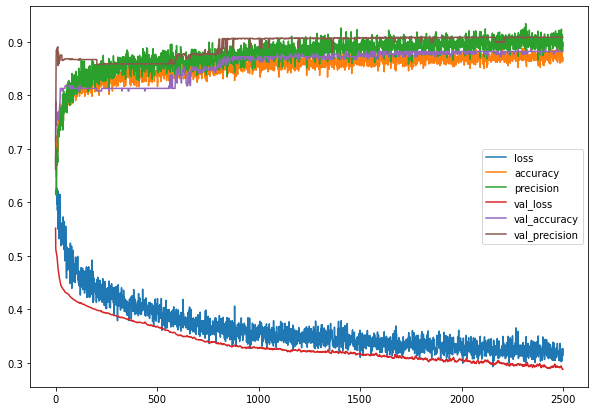

In [44]:
pd.DataFrame(history.history).plot(figsize=(10,7))

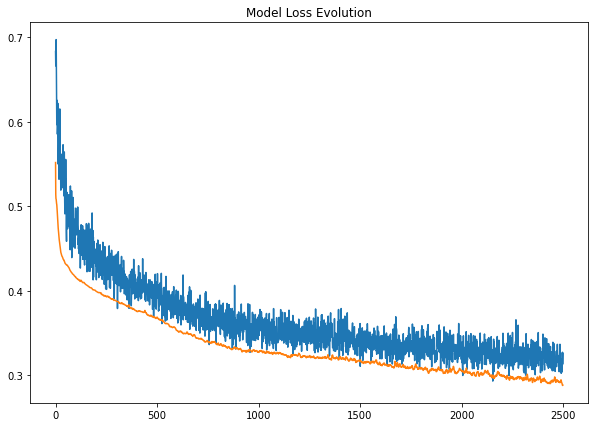

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = history.epoch
plt.figure(figsize=(10,7))
plt.title('Model Loss Evolution')
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)

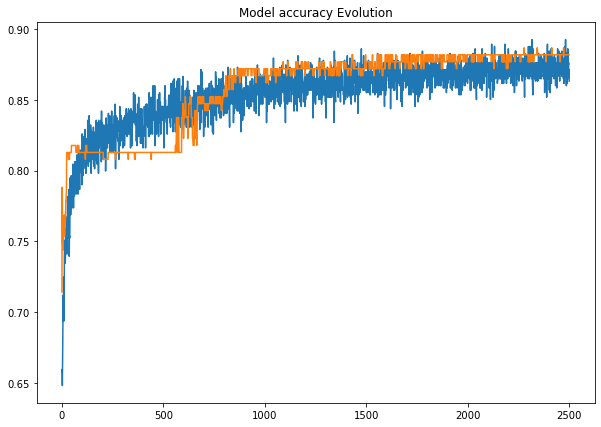

In [46]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = history.epoch
plt.figure(figsize=(10,7))
plt.title('Model accuracy Evolution')
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)

# TEST DEL MODELO DE PREDICCIÓN

In [47]:
labels_data_test = geoCult_data_TEST.pop('free')
geoCult_data_TEST.head(5)

,price,time_code,latitude,longitude,audience_code,event-location_code
0,0.0,0.0,40.397075,-3.766489,18.0,44.0
1,20.0,77.0,40.392414,-3.697248,18.0,181.0
2,0.0,77.0,40.392680,-3.759357,18.0,4.0
3,0.0,81.0,40.391053,-3.695808,18.0,137.0
4,0.0,0.0,40.391053,-3.695808,18.0,137.0


In [48]:
test_data = geoCult_data_TEST.to_numpy().astype('float64')
#test_data = np.reshape(test_data, [test_data.shape[0], test_data.shape[1], test_data.shape[2], test_data.shape[3], test_data.shape[4], test_data.shape[5]])
targets_data = labels_data_test.to_numpy()
labels_data = to_categorical(targets_data)

print("Test data shape: ", geoCult_data_TEST.shape)
print("Test targets_data shape: ", targets_data.shape)
print("Test labels_data shape: ", labels_data.shape)
print(test_data)
print(targets_data)
print(labels_data)

Test data shape:  (68, 6)
Test targets_data shape:  (68,)
Test labels_data shape:  (68, 2)
[[  0.           0.          40.39707463  -3.76648855  18.
   44.        ]
 [ 20.          77.          40.39241375  -3.69724769  18.
  181.        ]
 [  0.          77.          40.39268021  -3.7593573   18.
    4.        ]
 [  0.          81.          40.39105304  -3.69580797  18.
  137.        ]
 [  0.           0.          40.39105304  -3.69580797  18.
  137.        ]
 [  0.          75.          40.51967331  -3.77790557  18.
  104.        ]
 [  0.          53.          40.44774002  -3.62928745  18.
  144.        ]
 [  0.          77.          40.49504564  -3.68800703  18.
  128.        ]
 [  0.          77.          40.382819    -3.60614006  18.
   89.        ]
 [  0.          77.          40.37958462  -3.62311035  18.
   60.        ]
 [  0.          73.          40.43329163  -3.61056623  17.
   27.        ]
 [  0.           0.          40.39105304  -3.69580797  18.
  137.        ]
 [  0.   

In [49]:
# evaluation processes
"""
getting predictions with the trained model with the test data as input and 
getting the index of the max value in order to compare it with the labels
"""
preds = np.argmax(dense_net.predict(test_data), axis = 1) 
labels = np.argmax(labels_data, axis = 1) # getting the index of the max value of each column to compare it with the predictions in order to get pred results
results = preds == labels

print("PREDICTIONS: ")
print(preds)
print(" ")
print("LABELS: ")
print(labels)
print(" ")
print("RESULTS: ")
print(results)
print(" ")

PREDICTIONS: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 
LABELS: 
[1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1
 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1]
 
RESULTS: 
[False  True False  True  True False  True False False False False  True
 False False  True False False False  True False False False False False
  True False  True False False False  True False  True False  True False
 False  True False  True False  True  True False  True False False False
  True  True  True  True  True  True False False False False  True  True
  True False False  True  True  True False False]
 


In [50]:
# making simple stats according to the results obtained in the predictions

correct = np.sum(results == True)
incorrect = np.sum(results == False)
print("Correct: ", correct, " Correct Acc: ", (correct/len(results))*100)
print("Incorrect: ", incorrect, " Incorrect Acc: ", (incorrect/len(results))*100)

Correct:  29  Correct Acc:  42.64705882352941
Incorrect:  39  Incorrect Acc:  57.35294117647059


Text(0.5, 15.0, 'Real values')

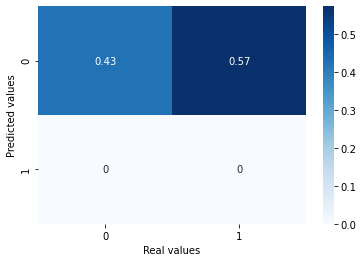

In [51]:
# plotting 

#confusion matrix
confusion_matrix = tf.math.confusion_matrix(preds, labels)
cm = plt.figure(1)
heat_map = sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, cmap='Blues')
plt.ylabel('Predicted values')
plt.xlabel('Real values')
#cm.savefig('/mnt/shared/rgomez/testing/22_confusion_matrix.png')